<a href="https://colab.research.google.com/github/shakib04/practice_cvpr/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [20]:
=type(x_train)
#Divide the data set into 5 parts

x_train_1 = x_train[0:10000]
x_train_2 = x_train[10000:20000]
x_train_3 = x_train[20000:30000]
x_train_4 = x_train[30000:40000]
x_train_5 = x_train[40000:50000]

x_train_lbl_1 = y_train[0:10000]
x_train_lbl_2 = y_train[10000:20000]
x_train_lbl_3 = y_train[20000:30000]
x_train_lbl_4 = y_train[30000:40000]
x_train_lbl_5 = y_train[40000:50000]

#every time one will be used for validation, another 04 will be for validation
k = 0
#loop 0 to 100 or 50
#for every k value, we get cross validation accuracy

modelTraining([x_train_1, x_train_2, x_train_3, x_train_4], [x_train_lbl_1, x_train_lbl_2, x_train_lbl_3, x_train_lbl_4], x_train_5)


Epoch 1/5


InvalidArgumentError: ignored

In [19]:
#method for train and test image
from tensorflow import keras
from tensorflow.keras import layers

def modelTraining(train_img_list,train_img_lbl_list, test_img):
    train_img = train_img_list[0] + train_img_list[1] + train_img_list[2] + train_img_list[3]
    train_img_lbl = train_img_lbl_list[0] + train_img_lbl_list[1] + train_img_lbl_list[2] + train_img_lbl_list[3]
    train_img, test_img = train_img.astype('float32') / 255, test_img.astype('float32') / 255

    model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
    ])
    #model.summary()
    model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )
    h = model.fit(x=train_img, y=train_img_lbl, epochs=5, batch_size=50, validation_data = test_img.all())
    return h


In [ ]:

x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
y_train[0][0]

6

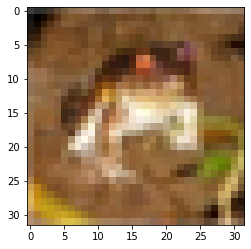

In [ ]:
plt.figure()

plt.imshow(x_train[0])

plt.show()

In [ ]:
s_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks

In [ ]:
print(y_train[0][0])


6


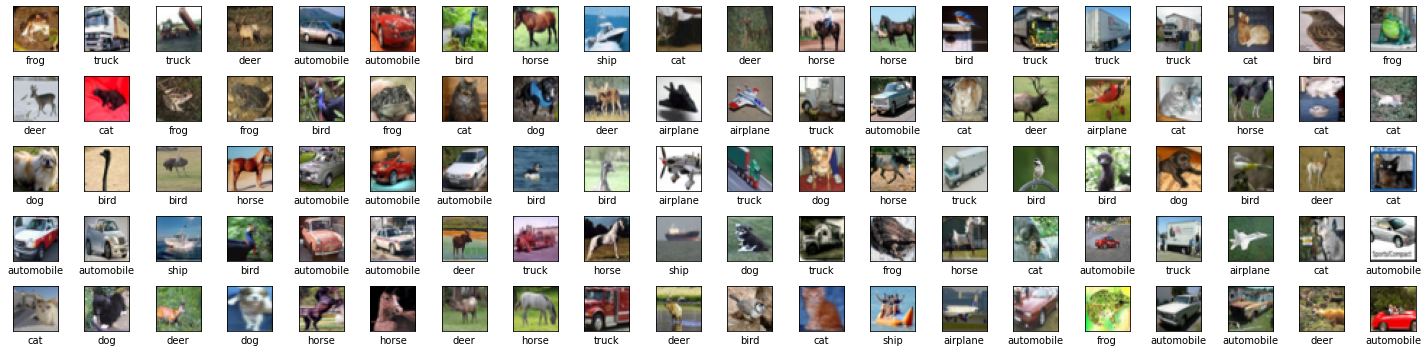

In [ ]:
i = 0
plt.figure(figsize=(20,5))

for i in range(100):
  plt.subplot(5, 20, i + 1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(s_names[y_train[i][0]])

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 512)         1180160   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)         1179904   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 595s 2s/step - loss: 1.6954 - accuracy: 0.3680 - val_loss: 1.4391 - val_accuracy: 0.4727
Epoch 2/10
313/313 [==============================] - 596s 2s/step - loss: 1.2603 - accuracy: 0.5448 - val_loss: 1.1525 - val_accuracy: 0.5946
Epoch 3/10
313/313 [==============================] - 592s 2s/step - loss: 1.0358 - accuracy: 0.6325 - val_loss: 0.9984 - val_accuracy: 0.6554
Epoch 4/10
313/313 [==============================] - 592s 2s/step - loss: 0.8816 - accuracy: 0.6916 - val_loss: 0.9369 - val_accuracy: 0.6721
Epoch 5/10
313/313 [==============================] - 592s 2s/step - loss: 0.7636 - accuracy: 0.7329 - val_loss: 0.8209 - val_accuracy: 0.7192
Epoch 6/10
313/313 [==============================] - 589s 2s/step - loss: 0.6719 - accuracy: 0.7674 - val_loss: 0.7655 - val_accuracy: 0.7335
Epoch 7/10
313/313 [==============================] - 591s 2s/step - loss: 0.5763 - accuracy: 0.7994 - val_loss: 0.8917 - val_accuracy: 0.7046

In [ ]:
test_loss, test_acc = model.evaluate()

https://nbviewer.org/github/Ulrich-Tonmoy/cvpr/blob/main/CNN_cifar10.ipynb